# Noise-induced Transitions. 
## Explorations of noise induced order (NIO) and noise-induced chaos (NIC) with last models.
### Correct use of arbitrary precision float operations implemented with 'BigFloat' julia object as a wraper for the corresponding MPFR C library

# 1a. NIO using BigFloat

In [85]:
function NIOvlmlBig(epsil::BigFloat,n::Int64,exponentk::Int64)
setprecision(16)
iters = collect(1:n-1)
d = 2.0^(-exponentk)
@show d
x = Array{BigFloat,1}(undef,n)
eRND = Array{BigFloat,1}(undef,n)
preLE = Array{BigFloat,1}(undef,n-1)
x[1] = rand(BigFloat)
# Seed for comparison between Big and 64 code
#x[1] = 7.593763724662871285337333335546251062425765410927767602987336549202870988717045e-02
@show x[1]
absd = BigFloat(abs(d))
    for j in iters
    xbfj = BigFloat(x[j])
    zro = BigFloat(0.0)
    one1 = BigFloat(1.0)
    oneovertwo = BigFloat(1/2)
    eRND[j] = epsil*(2*rand(BigFloat)-1)
        if xbfj < zro
            x[j+1] = d*x[j] + d + eRND[j]
            preLE[j] = log(BigFloat(absd))
            elseif xbfj >= zro  && xbfj < oneovertwo
            x[j+1] = 2*(1-d)*x[j] + d + eRND[j]
            preLE[j] = log(2*absd)
            elseif xbfj >= oneovertwo  && xbfj <= one1
            x[j+1] = 2*(1-d)*(1-x[j]) + d + eRND[j]
            preLE[j] = log(2*absd)
            elseif xbfj > one1
            x[j+1] = d*(1-x[j]) + d + eRND[j]
            preLE[j] = log(absd)
            else
            println("Breakpoint reached due to bad conditioning")
        end
    #@show preLE[j]
    end
    @show x[n]
    @show length(preLE)
    @show length(x)
    @show preLE[n-1]
    LyapExp = sum(preLE)/length(preLE)
    @show LyapExp
    #hist(x)
    return x
    return preLE 
    #return LyapExp
end

NIOvlmlBig (generic function with 1 method)

In [91]:
#(xorb, LyapunovExponent)= NIOvlmlBig(BigFloat(0.005),10000,7)
iters = 1000000
xorb= NIOvlmlBig(BigFloat(0.015),iters,7)

d = 0.0078125
x[1] = 7.35519e-01
x[n] = 8.74451e-01
length(preLE) = 999999
length(x) = 1000000
preLE[n - 1] = -4.15894
LyapExp = -5.24292e-01


1000000-element Array{BigFloat,1}:
 7.35519e-01
 5.3183e-01 
 9.44229e-01
 1.08768e-01
 2.25563e-01
 4.69002e-01
 9.30176e-01
 1.51169e-01
 3.0069e-01 
 5.95215e-01
 8.03085e-01
 4.02832e-01
 8.02139e-01
 ⋮          
 2.98759e-01
 5.98206e-01
 8.16223e-01
 3.71574e-01
 7.49939e-01
 5.12543e-01
 9.69116e-01
 5.60293e-02
 1.07943e-01
 2.22588e-01
 4.3911e-01 
 8.74451e-01

In [88]:
xorb

1000000-element Array{BigFloat,1}:
 6.72302e-02
 1.46587e-01
 3.11684e-01
 6.30585e-01
 7.45544e-01
 5.25604e-01
 9.63333e-01
 6.9231e-02 
 1.33942e-01
 2.74635e-01
 5.62286e-01
 8.62671e-01
 2.74971e-01
 ⋮          
 3.78799e-03
 2.34022e-02
 6.31351e-02
 1.23312e-01
 2.58652e-01
 5.14496e-01
 9.62173e-01
 7.96852e-02
 1.75304e-01
 3.59802e-01
 7.26685e-01
 5.38147e-01

In [92]:
plot(xorb,seriestype=:scatter)

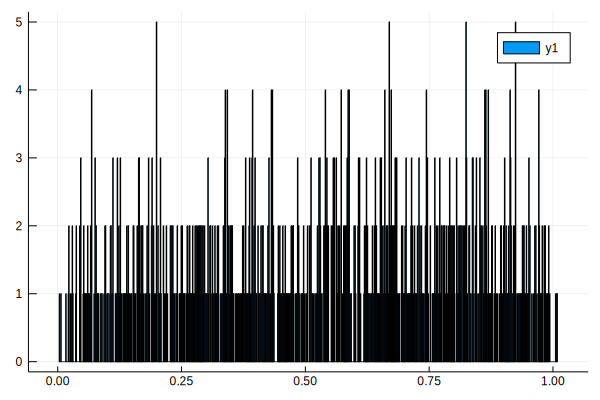

In [77]:
histogram(xorb,bins=1000)

In [76]:
typeof(xorb)

Array{BigFloat,1}

In [64]:
? histogram

search: histogram histogram! histogram2d histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```
